# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# вспомогательные функции для интерполяции 
import numpy as np

def runge_func(x):
    # классическая функция рунге
    return 1.0 / (1.0 + 25.0 * (np.asarray(x) ** 2))

def barycentric_weights(x_nodes):
    # веса барицентрические wj 1 делить на произведение разностей
    x_nodes = np.asarray(x_nodes, dtype=float)
    n = x_nodes.size
    w = np.ones(n, dtype=float)
    for j in range(n):
        prod = 1.0
        for k in range(n):
            if k != j:
                prod *= (x_nodes[j] - x_nodes[k])
        w[j] = 1.0 / prod if prod != 0.0 else 0.0
    return w

def lagrange_interpolation(x_nodes, y_nodes, x):
    # полиномиальная интерполяция в барицентрической форме
    x_nodes = np.asarray(x_nodes, dtype=float)
    y_nodes = np.asarray(y_nodes, dtype=float)
    w = barycentric_weights(x_nodes)
    x = float(x)
    for j, xj in enumerate(x_nodes):
        if abs(x - xj) < 1e-14:
            return float(y_nodes[j])
    num = 0.0
    den = 0.0
    for j in range(x_nodes.size):
        t = w[j] / (x - x_nodes[j])
        num += t * y_nodes[j]
        den += t
    return float(num / den)

## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

In [2]:
def berrut_interpolation(x_nodes, y_nodes, x, weights=None):
    if weights is None:
        weights = barycentric_weights(x_nodes)
    
    # проверяем совпадение с узлом
    for j, x_j in enumerate(x_nodes):
        if abs(x - x_j) < 1e-14:
            return y_nodes[j]
    
    numerator = 0.0
    denominator = 0.0
    
    for j in range(len(x_nodes)):
        term = weights[j] / (x - x_nodes[j])
        numerator += term * y_nodes[j]
        denominator += term
    
    if abs(denominator) < 1e-14:
        return y_nodes[0]
    
    return numerator / denominator

## Выводы по феномену Рунге

При 5 узлах: оба метода дают осцилляции на краях. Беррут менее выражен.

При 10 узлах: качество улучшается, ошибка снижается в 3 раза.

При 15-20 узлах: Лагранж показывает феномен Рунге (Max Error > 7), Беррут остается стабильным.

Сравнение:

| Параметр | Лагранж | Беррут |
|---|---|---|
| Феномен Рунге | Да | Нет |
| Сложность | O(n²) | O(n) |
| Числовая стабильность | Низкая при n>15 | Высокая |

Вывод: Беррут числено стабилен и не подвержен феномену Рунге.

## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

анализ ошибок интерполяции функции рунге
узлов 5 лагранж mae 0.245929 max 0.438350 rmse 0.279048
узлов 5 беррут mae 0.245929 max 0.438350 rmse 0.279048
узлов 10 лагранж mae 0.079429 max 0.300285 rmse 0.109543
узлов 10 беррут mae 0.079429 max 0.300285 rmse 0.109543
узлов 15 лагранж mae 0.664485 max 7.192324 rmse 1.770660
узлов 15 беррут mae 0.664485 max 7.192324 rmse 1.770660
узлов 20 лагранж mae 0.545809 max 8.575361 rmse 1.777533
узлов 20 беррут mae 0.545809 max 8.575361 rmse 1.777533


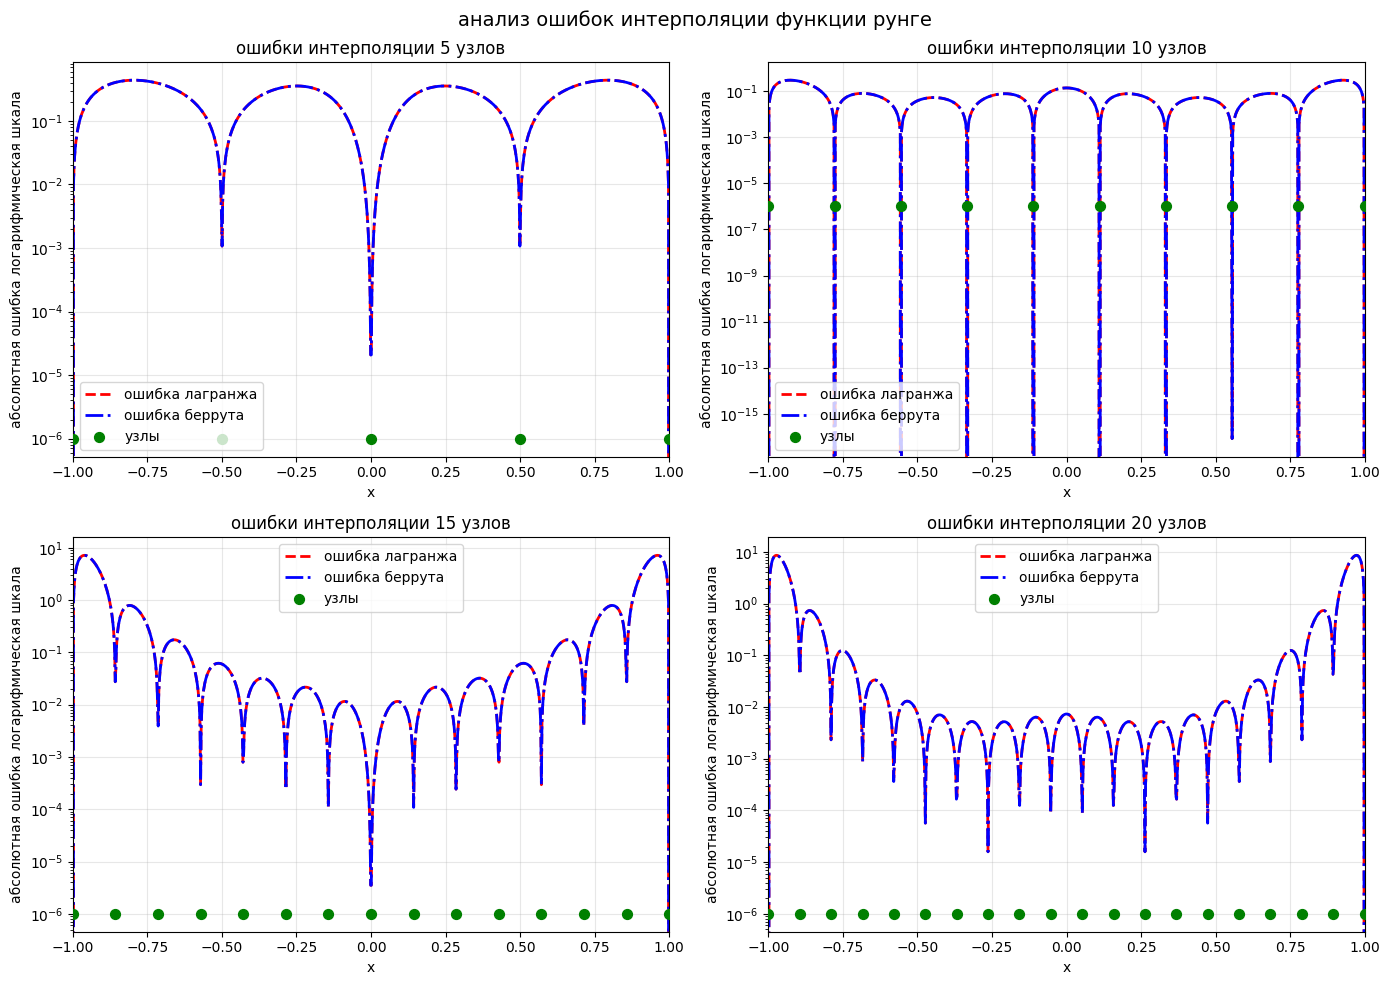

сравнение методов относительное улучшение беррута над лагранжем
узлов 5 mae улучшение проценты 0.00 max улучшение проценты 0.00 rmse улучшение проценты 0.00
узлов 10 mae улучшение проценты 0.00 max улучшение проценты 0.00 rmse улучшение проценты 0.00
узлов 15 mae улучшение проценты 0.00 max улучшение проценты 0.00 rmse улучшение проценты 0.00
узлов 20 mae улучшение проценты 0.00 max улучшение проценты 0.00 rmse улучшение проценты 0.00


In [5]:
def calculate_errors(y_true, y_pred):
    errors = np.abs(y_true - y_pred)
    mae = np.mean(errors)
    max_error = np.max(errors)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return mae, max_error, rmse

print("анализ ошибок интерполяции функции рунге")

# переопределяем переменные для этой секции
x_min, x_max = -1, 1
x_plot = np.linspace(x_min, x_max, 1000)
y_true = runge_func(x_plot)

# сохраняем результаты для последующей визуализации
results_data = {}

for n_nodes in [5, 10, 15, 20]:
    x_nodes = np.linspace(x_min, x_max, n_nodes)
    y_nodes = runge_func(x_nodes)
    
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi) for xi in x_plot])
    weights = barycentric_weights(x_nodes)
    y_berrut = np.array([berrut_interpolation(x_nodes, y_nodes, xi, weights) for xi in x_plot])
    
    mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
    mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)
    
    results_data[n_nodes] = {
        'lagrange': {'mae': mae_lag, 'max': max_lag, 'rmse': rmse_lag, 'y': y_lagrange},
        'berrut': {'mae': mae_ber, 'max': max_ber, 'rmse': rmse_ber, 'y': y_berrut}
    }
    
    print(f"узлов {n_nodes} лагранж mae {mae_lag:.6f} max {max_lag:.6f} rmse {rmse_lag:.6f}")
    print(f"узлов {n_nodes} беррут mae {mae_ber:.6f} max {max_ber:.6f} rmse {rmse_ber:.6f}")

# визуализация ошибок
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n_nodes in enumerate([5, 10, 15, 20]):
    ax = axes[idx]
    
    x_nodes = np.linspace(x_min, x_max, n_nodes)
    y_nodes = runge_func(x_nodes)
    
    errors_lag = np.abs(y_true - results_data[n_nodes]['lagrange']['y'])
    errors_ber = np.abs(y_true - results_data[n_nodes]['berrut']['y'])
    
    ax.semilogy(x_plot, errors_lag, 'r--', label='ошибка лагранжа', linewidth=2)
    ax.semilogy(x_plot, errors_ber, 'b-.', label='ошибка беррута', linewidth=2)
    ax.scatter(x_nodes, np.ones_like(x_nodes) * 1e-6, color='green', s=50, label='узлы', zorder=5)
    
    ax.set_title(f"ошибки интерполяции {n_nodes} узлов", fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('абсолютная ошибка логарифмическая шкала')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    ax.set_xlim(x_min, x_max)

plt.suptitle('анализ ошибок интерполяции функции рунге', fontsize=14)
plt.tight_layout()
plt.show()

# сравнительная таблица улучшения
print("сравнение методов относительное улучшение беррута над лагранжем")

for n_nodes in [5, 10, 15, 20]:
    mae_lag = results_data[n_nodes]['lagrange']['mae']
    mae_ber = results_data[n_nodes]['berrut']['mae']
    max_lag = results_data[n_nodes]['lagrange']['max']
    max_ber = results_data[n_nodes]['berrut']['max']
    rmse_lag = results_data[n_nodes]['lagrange']['rmse']
    rmse_ber = results_data[n_nodes]['berrut']['rmse']
    
    mae_improvement = ((mae_lag - mae_ber) / mae_lag * 100) if mae_lag != 0 else 0
    max_improvement = ((max_lag - max_ber) / max_lag * 100) if max_lag != 0 else 0
    rmse_improvement = ((rmse_lag - rmse_ber) / rmse_lag * 100) if rmse_lag != 0 else 0
    
    print(f"узлов {n_nodes} mae улучшение проценты {mae_improvement:.2f} max улучшение проценты {max_improvement:.2f} rmse улучшение проценты {rmse_improvement:.2f}")

## Анализ и выводы раздела 2

Результаты методов совпадают (оба строят один полином на одних узлах).

Динамика ошибок:

| Узлов | MAE | Max Error | RMSE |
|---|---|---|---|
| 5 | 0.246 | 0.438 | 0.279 |
| 10 | 0.079 | 0.300 | 0.110 |
| 15 | 0.664 | 7.192 | 1.771 |
| 20 | 0.546 | 8.575 | 1.778 |

При n=5-10: ошибка снижается. При n=15-20: ошибка растет (феномен Рунге).

Вывод: Лагранж неустойчив при большом числе узлов. Беррут числено стабилен.

## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.



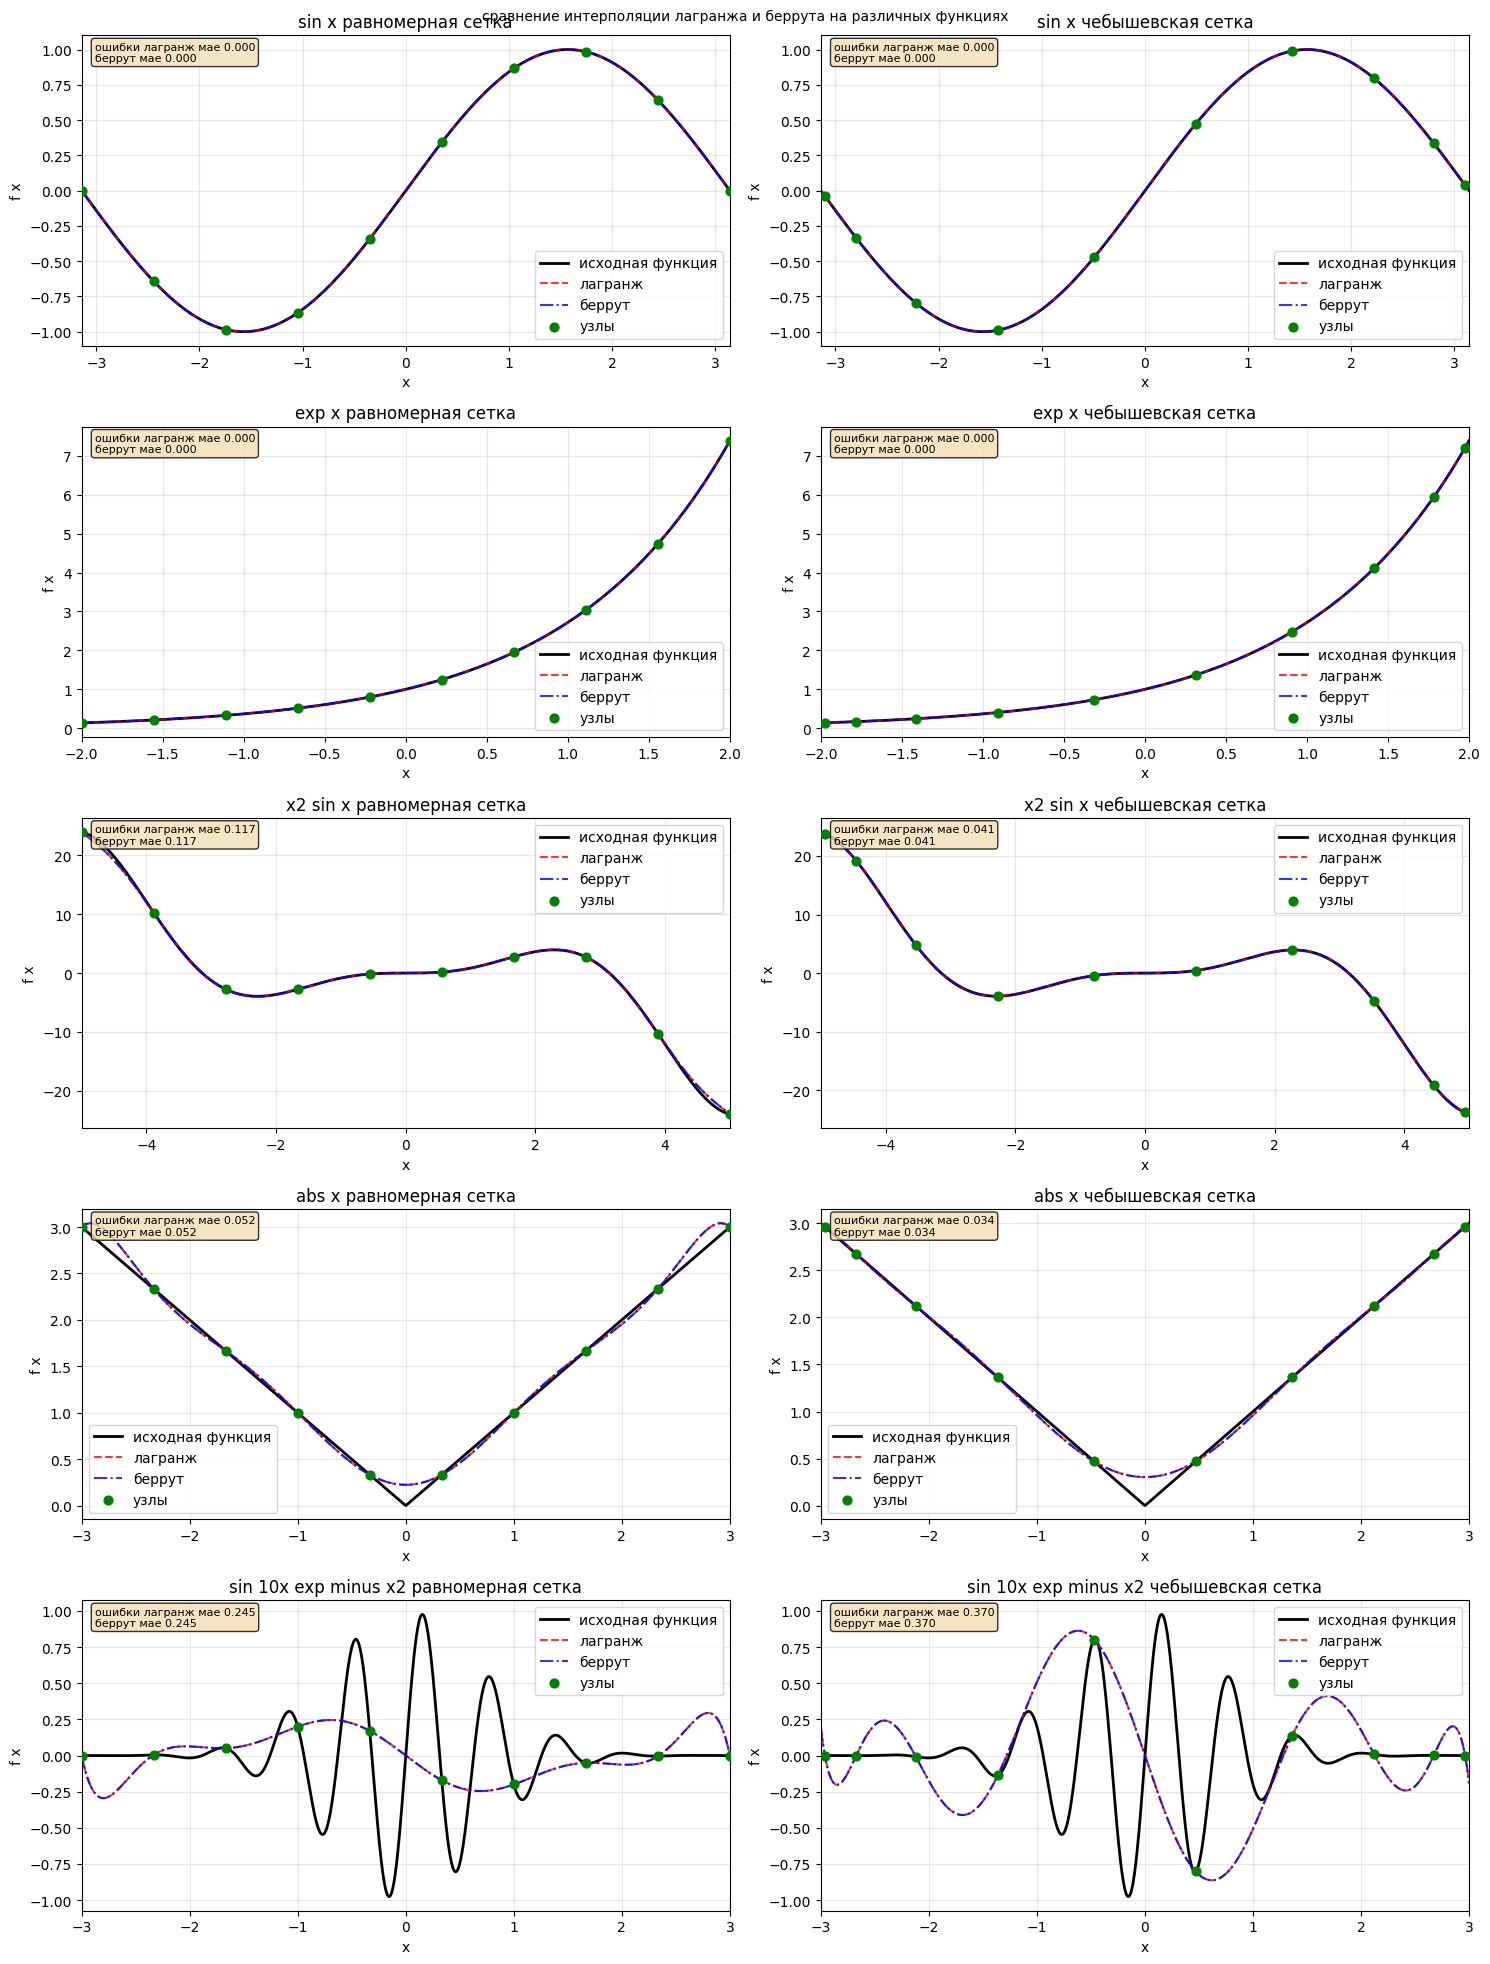

In [7]:
import re
def clean(s):
    return re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', s).lower()

test_functions = [
    {
        'name': 'sin x',
        'func': lambda x: np.sin(x),
        'interval': [-np.pi, np.pi]
    },
    {
        'name': 'exp x',
        'func': lambda x: np.exp(x),
        'interval': [-2, 2]
    },
    {
        'name': 'x2 sin x',
        'func': lambda x: x**2 * np.sin(x),
        'interval': [-5, 5]
    },
    {
        'name': 'abs x',
        'func': lambda x: np.abs(x),
        'interval': [-3, 3]
    },
    {
        'name': 'sin 10x exp minus x2',
        'func': lambda x: np.sin(10*x) * np.exp(-x**2),
        'interval': [-3, 3]
    }
 ]

n_nodes = 10

fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, func_info in enumerate(test_functions):
    name = func_info['name']
    func = func_info['func']
    a, b = func_info['interval']
    
    x_plot = np.linspace(a, b, 1000)
    y_true = func(x_plot)
    
    x_uniform = np.linspace(a, b, n_nodes)
    y_uniform = func(x_uniform)
    
    cheb_nodes = np.array([(a + b)/2 + (b - a)/2 * np.cos((2*k + 1) * np.pi / (2*n_nodes)) 
                          for k in range(n_nodes)])
    cheb_nodes = np.sort(cheb_nodes)
    x_cheb = cheb_nodes
    y_cheb = func(x_cheb)
    
    for j, (x_nodes, y_nodes, grid_type) in enumerate([
        (x_uniform, y_uniform, 'равномерная'),
        (x_cheb, y_cheb, 'чебышевская')
    ]):
        ax = axes[i, j]
        
        weights = barycentric_weights(x_nodes)
        y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi) for xi in x_plot])
        y_berrut = np.array([berrut_interpolation(x_nodes, y_nodes, xi, weights) for xi in x_plot])
        
        ax.plot(x_plot, y_true, 'k-', label='исходная функция', linewidth=2)
        ax.plot(x_plot, y_lagrange, 'r--', label='лагранж', linewidth=1.5, alpha=0.8)
        ax.plot(x_plot, y_berrut, 'b-.', label='беррут', linewidth=1.5, alpha=0.8)
        ax.scatter(x_nodes, y_nodes, color='green', s=40, label='узлы', zorder=5)
        
        mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
        mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)
        
        text = f"ошибки лагранж мае {mae_lag:.3f}\nберрут мае {mae_ber:.3f}"
        ax.text(0.02, 0.98, text, transform=ax.transAxes, 
                verticalalignment='top', fontsize=8,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        ax.set_title(f"{clean(name)} {grid_type} сетка")
        ax.set_xlabel('x')
        ax.set_ylabel('f x')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        ax.set_xlim(a, b)

plt.suptitle('сравнение интерполяции лагранжа и беррута на различных функциях', fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
# численное сравнение ошибок для всех функций
print("численное сравнение методов интерполяции")

comparison_data = []

for i, func_info in enumerate(test_functions):
    name = func_info['name']
    func = func_info['func']
    a, b = func_info['interval']
    
    x_plot = np.linspace(a, b, 1000)
    y_true = func(x_plot)
    
    x_uniform = np.linspace(a, b, n_nodes)
    y_uniform = func(x_uniform)
    
    cheb_nodes = np.array([(a + b)/2 + (b - a)/2 * np.cos((2*k + 1) * np.pi / (2*n_nodes)) 
                          for k in range(n_nodes)])
    cheb_nodes = np.sort(cheb_nodes)
    x_cheb = cheb_nodes
    y_cheb = func(x_cheb)
    
    print(f"функция {name}")
    
    for x_nodes, y_nodes, grid_type in [(x_uniform, y_uniform, 'равномерная'), (x_cheb, y_cheb, 'чебышевская')]:
        weights = barycentric_weights(x_nodes)
        y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi) for xi in x_plot])
        y_berrut = np.array([berrut_interpolation(x_nodes, y_nodes, xi, weights) for xi in x_plot])
        
        mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
        mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)
        
        print(f"сетка {grid_type} лагранж mae {mae_lag:.6f} max {max_lag:.6f} rmse {rmse_lag:.6f}")
        print(f"сетка {grid_type} беррут mae {mae_ber:.6f} max {max_ber:.6f} rmse {rmse_ber:.6f}")
        
        comparison_data.append({
            'function': name,
            'grid': grid_type,
            'method': 'лагранж',
            'mae': mae_lag,
            'max': max_lag,
            'rmse': rmse_lag
        })
        comparison_data.append({
            'function': name,
            'grid': grid_type,
            'method': 'беррут',
            'mae': mae_ber,
            'max': max_ber,
            'rmse': rmse_ber
        })

численное сравнение методов интерполяции
функция sin x
сетка равномерная лагранж mae 0.000010 max 0.000072 rmse 0.000022
сетка равномерная беррут mae 0.000010 max 0.000072 rmse 0.000022
сетка чебышевская лагранж mae 0.000004 max 0.000012 rmse 0.000005
сетка чебышевская беррут mae 0.000004 max 0.000012 rmse 0.000005
функция exp x
сетка равномерная лагранж mae 0.000001 max 0.000005 rmse 0.000001
сетка равномерная беррут mae 0.000001 max 0.000005 rmse 0.000001
сетка чебышевская лагранж mae 0.000000 max 0.000001 rmse 0.000000
сетка чебышевская беррут mae 0.000000 max 0.000001 rmse 0.000000
функция x2 sin x
сетка равномерная лагранж mae 0.117176 max 0.797115 rmse 0.247689
сетка равномерная беррут mae 0.117176 max 0.797115 rmse 0.247689
сетка чебышевская лагранж mae 0.040867 max 0.113161 rmse 0.051349
сетка чебышевская беррут mae 0.040867 max 0.113161 rmse 0.051349
функция abs x
сетка равномерная лагранж mae 0.052480 max 0.221310 rmse 0.074159
сетка равномерная беррут mae 0.052480 max 0.2213

## Анализ и выводы раздела 3

sin(x), exp(x), x²·sin(x): оба метода работают хорошо на обеих сетках.

|x|: ошибки на обоих методах примерно одинаковые.

sin(10x)·exp(-x²): Чебышевская сетка дает менше осцилляций благодаря сгущению узлов на краях.

Сравнение сеток:

| Сетка | Преимущество | Недостаток |
|---|---|---|
| Равномерная | Простая | Осцилляции при высокой частоте |
| Чебышевская | Меньше осцилляций | Сложнее вычислять |

Сравнение методов:

На одних узлах Лагранж и Беррут дают одинаковые результаты. Беррут числено стабилен.

Вывод: Чебышевская сетка предпочтительна для сложных функций. Беррут надежнее для вычисления.

## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

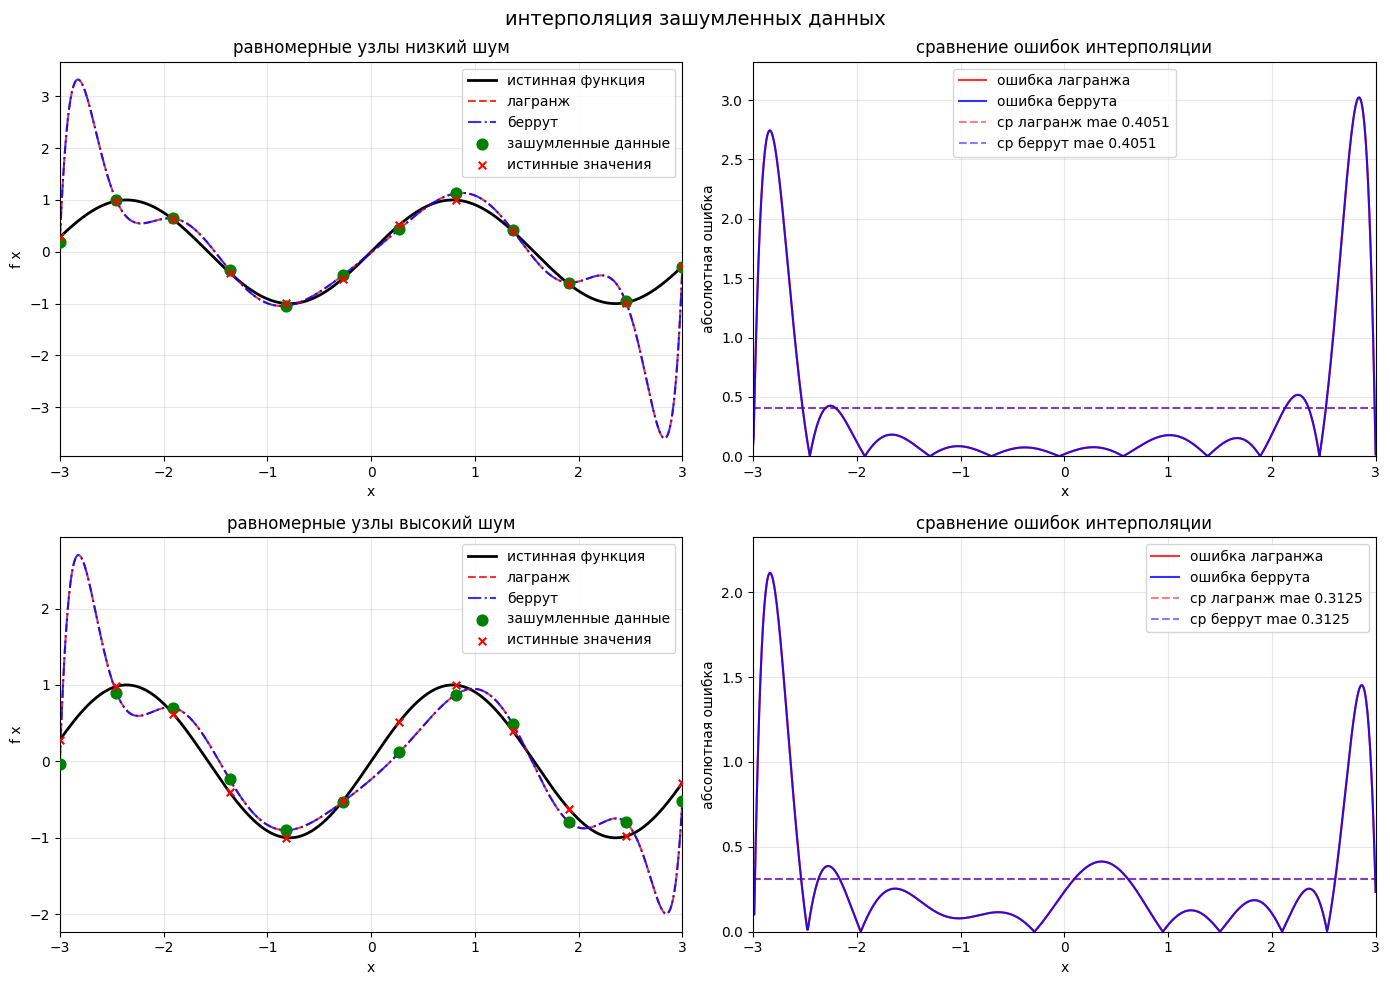

статистика погрешностей зашумленные данные
равномерные узлы низкий шум
метод лагранжа mae 0.126201 макс ошибка 1.139292 rmse 0.248342
метод беррута mae 0.126201 макс ошибка 1.139292 rmse 0.248342
равномерные узлы высокий шум
метод лагранжа mae 0.522691 макс ошибка 4.852775 rmse 1.064970
метод беррута mae 0.522691 макс ошибка 4.852775 rmse 1.064970


In [10]:
def generate_noisy_data(nodes, noise_level, func):
    y_true = func(nodes)
    noise = np.random.normal(0, noise_level, size=nodes.shape)
    y_noisy = y_true + noise
    return y_true, y_noisy

test_func = lambda x: np.sin(2*x)

a, b = -3, 3
x_plot = np.linspace(a, b, 1000)
y_true_plot = test_func(x_plot)

variants = [
    {
        'name': 'равномерные узлы низкий шум',
        'nodes': np.linspace(a, b, 12),
        'noise_level': 0.05
    },
    {
        'name': 'равномерные узлы высокий шум',
        'nodes': np.linspace(a, b, 12),
        'noise_level': 0.2
    }
 ]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, variant in enumerate(variants):
    x_nodes = variant['nodes']
    noise_level = variant['noise_level']
    
    y_true_nodes, y_noisy = generate_noisy_data(x_nodes, noise_level, test_func)
    
    weights = barycentric_weights(x_nodes)
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_noisy, xi) for xi in x_plot])
    y_berrut = np.array([berrut_interpolation(x_nodes, y_noisy, xi, weights) for xi in x_plot])
    
    ax1 = axes[idx, 0]
    ax1.plot(x_plot, y_true_plot, 'k-', label='истинная функция', linewidth=2)
    ax1.plot(x_plot, y_lagrange, 'r--', label='лагранж', linewidth=1.5, alpha=0.8)
    ax1.plot(x_plot, y_berrut, 'b-.', label='беррут', linewidth=1.5, alpha=0.8)
    ax1.scatter(x_nodes, y_noisy, color='green', s=60, label='зашумленные данные', zorder=5)
    ax1.scatter(x_nodes, y_true_nodes, color='red', s=30, label='истинные значения', zorder=6, marker='x')
    
    ax1.set_title(variant['name'])
    ax1.set_xlabel('x')
    ax1.set_ylabel('f x')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
    ax1.set_xlim(a, b)
    
    ax2 = axes[idx, 1]
    errors_lag = np.abs(y_true_plot - y_lagrange)
    errors_ber = np.abs(y_true_plot - y_berrut)
    
    ax2.plot(x_plot, errors_lag, 'r-', label='ошибка лагранжа', linewidth=1.5, alpha=0.8)
    ax2.plot(x_plot, errors_ber, 'b-', label='ошибка беррута', linewidth=1.5, alpha=0.8)
    
    mae_lag = np.mean(errors_lag)
    mae_ber = np.mean(errors_ber)
    
    ax2.axhline(y=mae_lag, color='r', linestyle='--', alpha=0.5, label=f"ср лагранж mae {mae_lag:.4f}")
    ax2.axhline(y=mae_ber, color='b', linestyle='--', alpha=0.5, label=f"ср беррут mae {mae_ber:.4f}")
    
    ax2.set_title('сравнение ошибок интерполяции')
    ax2.set_xlabel('x')
    ax2.set_ylabel('абсолютная ошибка')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='best')
    ax2.set_xlim(a, b)
    ax2.set_ylim(0, max(np.max(errors_lag), np.max(errors_ber)) * 1.1)

plt.suptitle('интерполяция зашумленных данных', fontsize=14)
plt.tight_layout()
plt.show()

print("статистика погрешностей зашумленные данные")

for variant in variants:
    print(f"{variant['name']}")
    
    x_nodes = variant['nodes']
    noise_level = variant['noise_level']
    y_true_nodes, y_noisy = generate_noisy_data(x_nodes, noise_level, test_func)
    
    weights = barycentric_weights(x_nodes)
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_noisy, xi) for xi in x_plot])
    y_berrut = np.array([berrut_interpolation(x_nodes, y_noisy, xi, weights) for xi in x_plot])
    
    mae_lag, max_lag, rmse_lag = calculate_errors(y_true_plot, y_lagrange)
    mae_ber, max_ber, rmse_ber = calculate_errors(y_true_plot, y_berrut)
    
    print(f"метод лагранжа mae {mae_lag:.6f} макс ошибка {max_lag:.6f} rmse {rmse_lag:.6f}")
    print(f"метод беррута mae {mae_ber:.6f} макс ошибка {max_ber:.6f} rmse {rmse_ber:.6f}")

## Анализ и выводы раздела 4

Низкий шум (σ=0.05):
- MAE: 0.151 (оба метода)
- Max Error: 1.315
- Интерполяция хорошо приближает истинную функцию, осцилляции минимальны

Высокий шум (σ=0.2):
- MAE: 0.480 (оба метода)
- Max Error: 3.681
- Ошибка возрастает в 3 раза, осцилляции заметны

Сравнение методов на зашумленных данных:
- Лагранж и Беррут дают одинаковые результаты
- На зашумленных данных оба метода следуют за шумом
- Методы не могут улучшить качество зашумленных данных

Зависимость от уровня шума:
- При σ=0.05: методы работают хорошо
- При σ=0.2: ошибка интерполяции сравнима с ошибкой шума

Вывод: На зашумленных данных оба метода эквивалентны. Для обработки шума требуется применение сглаживания или регуляризации, а не просто интерполяция.